# UKCI 2021 Analytics

This contains analytics for the 2021 UKCI paper _for best fitness times_ between the old and new asynchronous parent selection strategies.

Objectives:

* Are there differences in the quality of answers between the two approaches?
* Get _when_ the best fitnesses were found by run type and run (where run type is between the two asynchronous selection strategies)
* Plot a boxplot of that
* Calculate a Wilcoxon rank-sum test of those results
* PROFIT

In [1]:
import pandas as pd
from pathlib import Path

from matplotlib import pyplot as plt
%matplotlib notebook

import seaborn as sns
import numpy as np
from scipy.stats import wilcoxon

from async_sim.analytics import consolidate_csv_as_df, idle_vs_work_times

## First let's snarf up Katies's et al F1TENTH results

In [2]:
cd ./data/

/Users/eric/code/async_2021/results/katie_results/2021-09-16_updated_results/data


In [3]:
# Get the first set of asynchronous results that use the original uniform random parent selection
async_df = consolidate_csv_as_df(Path('.').glob('workers_async_?.csv'), infer_run=True)

reading workers_async_0.csv
Adding run number 0
reading workers_async_1.csv
Adding run number 1
reading workers_async_3.csv
Adding run number 3
reading workers_async_2.csv
Adding run number 2
reading workers_async_6.csv
Adding run number 6
reading workers_async_7.csv
Adding run number 7
reading workers_async_5.csv
Adding run number 5
reading workers_async_4.csv
Adding run number 4
reading workers_async_9.csv
Adding run number 9
reading workers_async_8.csv
Adding run number 8


In [4]:
async_df['run_type'] = 'async'

In [5]:
# Get the second set of asynchronous results using the new selection paradigm
pro_async_df = consolidate_csv_as_df(Path('.').glob('workers_async_proselect_?.csv'), infer_run=True)

reading workers_async_proselect_6.csv
Adding run number 6
reading workers_async_proselect_7.csv
Adding run number 7
reading workers_async_proselect_5.csv
Adding run number 5
reading workers_async_proselect_4.csv
Adding run number 4
reading workers_async_proselect_0.csv
Adding run number 0
reading workers_async_proselect_1.csv
Adding run number 1
reading workers_async_proselect_3.csv
Adding run number 3
reading workers_async_proselect_2.csv
Adding run number 2
reading workers_async_proselect_9.csv
Adding run number 9
reading workers_async_proselect_8.csv
Adding run number 8


In [6]:
pro_async_df['run_type'] = 'proasync'

Now consolidate the two dataframes.

In [7]:
async_and_proasync_df = pd.concat([async_df, pro_async_df], ignore_index=True)

In [8]:
async_and_proasync_df.reindex()

,hostname,pid,uuid,birth_id,start_eval_time,stop_eval_time,fitness,run,run_type
0,thelio,16511,d5f230e5-f52a-4138-bbb9-ede9b793e447,28,1.630523e+09,1.630523e+09,0.002308,0,async
1,thelio,16496,81117255-5ec9-4265-813e-a5c9c294c6d0,29,1.630523e+09,1.630523e+09,0.002866,0,async
2,thelio,16479,f767ff9e-1c02-4b19-ba0b-4c5f13adfe29,46,1.630523e+09,1.630523e+09,0.002325,0,async
3,thelio,16511,eb8d36ca-55bb-49c0-8d0d-0bdffa268caf,12,1.630523e+09,1.630523e+09,0.002390,0,async
4,thelio,16518,63708a16-33b1-489b-83dc-6c522b981a43,15,1.630523e+09,1.630523e+09,0.002164,0,async
...,...,...,...,...,...,...,...,...,...
119995,thelio,124168,1bdf6b3b-a32d-4b5a-9f27-a4fdc8bbff32,5984,1.630224e+09,1.630224e+09,0.496145,8,proasync
119996,thelio,124147,3309d08a-0097-4037-86b5-1276659b5516,5989,1.630224e+09,1.630224e+09,0.573177,8,proasync
119997,thelio,124147,9ba94519-bdd4-42f7-a9bf-efb7e9d32e30,5988,1.630224e+09,1.630224e+09,0.594245,8,proasync
119998,thelio,124168,ab6344a6-fc83-4c9e-9148-296a74fe502c,5974,1.630224e+09,1.630224e+09,0.739160,8,proasync


In [9]:
async_and_proasync_df

,hostname,pid,uuid,birth_id,start_eval_time,stop_eval_time,fitness,run,run_type
0,thelio,16511,d5f230e5-f52a-4138-bbb9-ede9b793e447,28,1.630523e+09,1.630523e+09,0.002308,0,async
1,thelio,16496,81117255-5ec9-4265-813e-a5c9c294c6d0,29,1.630523e+09,1.630523e+09,0.002866,0,async
2,thelio,16479,f767ff9e-1c02-4b19-ba0b-4c5f13adfe29,46,1.630523e+09,1.630523e+09,0.002325,0,async
3,thelio,16511,eb8d36ca-55bb-49c0-8d0d-0bdffa268caf,12,1.630523e+09,1.630523e+09,0.002390,0,async
4,thelio,16518,63708a16-33b1-489b-83dc-6c522b981a43,15,1.630523e+09,1.630523e+09,0.002164,0,async
...,...,...,...,...,...,...,...,...,...
119995,thelio,124168,1bdf6b3b-a32d-4b5a-9f27-a4fdc8bbff32,5984,1.630224e+09,1.630224e+09,0.496145,8,proasync
119996,thelio,124147,3309d08a-0097-4037-86b5-1276659b5516,5989,1.630224e+09,1.630224e+09,0.573177,8,proasync
119997,thelio,124147,9ba94519-bdd4-42f7-a9bf-efb7e9d32e30,5988,1.630224e+09,1.630224e+09,0.594245,8,proasync
119998,thelio,124168,ab6344a6-fc83-4c9e-9148-296a74fe502c,5974,1.630224e+09,1.630224e+09,0.739160,8,proasync


In [10]:
async_and_proasync_df.run_type.value_counts() # just a reality check to ensure we have the same number for both experiments

async       60000
proasync    60000
Name: run_type, dtype: int64

In [11]:
by_run_and_type = async_and_proasync_df.groupby(['run_type','run'])

In [12]:
by_run_and_type.birth_id.agg(['count','min','max']) # sanity check to ensure we dropped the right rows

count  min   max
run_type run                  
async    0     6000    0  5999
         1     6000    0  5999
         2     6000    0  5999
         3     6000    0  5999
         4     6000    0  5999
         5     6000    0  5999
         6     6000    0  5999
         7     6000    0  5999
         8     6000    0  5999
         9     6000    0  5999
proasync 0     6000    0  5999
         1     6000    0  5999
         2     6000    0  5999
         3     6000    0  5999
         4     6000    0  5999
         5     6000    0  5999
         6     6000    0  5999
         7     6000    0  5999
         8     6000    0  5999
         9     6000    0  5999

## Differences in fitness quality between the runs

First to see if there are significant differences between the fitnesses between runs.

In [13]:
async_and_proasync_df.groupby(['run_type']).fitness.max()

run_type
async       0.615742
proasync    0.800674
Name: fitness, dtype: float64

In [14]:
run_durations = by_run_and_type.agg({'start_eval_time' : min, 'stop_eval_time' : max, 'fitness' : max})

In [15]:
run_durations

start_eval_time  stop_eval_time   fitness
run_type run                                           
async    0       1.630523e+09    1.630525e+09  0.131502
         1       1.630525e+09    1.630530e+09  0.217943
         2       1.630530e+09    1.630534e+09  0.061458
         3       1.630534e+09    1.630545e+09  0.423535
         4       1.630545e+09    1.630552e+09  0.284715
         5       1.630552e+09    1.630561e+09  0.491908
         6       1.630561e+09    1.630565e+09  0.114397
         7       1.630565e+09    1.630568e+09  0.064862
         8       1.630568e+09    1.630570e+09  0.128881
         9       1.630570e+09    1.630591e+09  0.615742
proasync 0       1.630065e+09    1.630077e+09  0.617815
         1       1.630080e+09    1.630094e+09  0.678483
         2       1.630101e+09    1.630109e+09  0.599575
         3       1.630118e+09    1.630120e+09  0.139518
         4       1.630149e+09    1.630169e+09  0.669403
         5       1.630175e+09    1.630178e+09  0.083407
         6       1.630187e+09    1.630190e+09  0.257839
         7       1.630194e+09    1.630198e+09  0.188867
         8       1.630203e+09    1.630224e+09  0.794226
         9       1.630228e+09    1.630241e+09  0.800674

In [16]:
run_durations.reset_index(drop=False)

,run_type,run,start_eval_time,stop_eval_time,fitness
0,async,0,1.630523e+09,1.630525e+09,0.131502
1,async,1,1.630525e+09,1.630530e+09,0.217943
2,async,2,1.630530e+09,1.630534e+09,0.061458
3,async,3,1.630534e+09,1.630545e+09,0.423535
4,async,4,1.630545e+09,1.630552e+09,0.284715
5,async,5,1.630552e+09,1.630561e+09,0.491908
6,async,6,1.630561e+09,1.630565e+09,0.114397
7,async,7,1.630565e+09,1.630568e+09,0.064862
8,async,8,1.630568e+09,1.630570e+09,0.128881
9,async,9,1.630570e+09,1.630591e+09,0.615742


Now we need to somehow get the _run_ `min(start_eval_time)` that is the baseline time and subtract the `stop_eval_time` column from that to get how long it was into the run before we found the best fitness.

In [17]:
where_max_fitness = async_and_proasync_df.groupby(['run_type','run']).fitness.idxmax()

In [18]:
where_max_fitness # indices into original dataframe where the fitness is the maximum

run_type  run
async     0        5373
          1        9711
          2       18905
          3       17978
          4       47995
          5       40750
          6       28699
          7       34630
          8       59123
          9       53829
proasync  0       88970
          1       95935
          2      107996
          3      101567
          4       83888
          5       76997
          6       65976
          7       71785
          8      119258
          9      113800
Name: fitness, dtype: int64

In [19]:
when_best_fitness = async_and_proasync_df.loc[where_max_fitness][['run_type', 'run', 'stop_eval_time', 'fitness']].copy()

In [20]:
# When we merge columns we don't want to overwrite stop_eval_time, so rename it to something meaningful
when_best_fitness.rename(columns={'stop_eval_time' : 'found_eval_time'}, inplace=True)

In [21]:
final_when_best_fitnesses = when_best_fitness.merge(run_durations, on=['run_type','run'])

In [22]:
final_when_best_fitnesses

,run_type,run,found_eval_time,fitness_x,start_eval_time,stop_eval_time,fitness_y
0,async,0,1.630525e+09,0.131502,1.630523e+09,1.630525e+09,0.131502
1,async,1,1.630527e+09,0.217943,1.630525e+09,1.630530e+09,0.217943
2,async,2,1.630531e+09,0.061458,1.630530e+09,1.630534e+09,0.061458
3,async,3,1.630545e+09,0.423535,1.630534e+09,1.630545e+09,0.423535
4,async,4,1.630552e+09,0.284715,1.630545e+09,1.630552e+09,0.284715
5,async,5,1.630556e+09,0.491908,1.630552e+09,1.630561e+09,0.491908
6,async,6,1.630564e+09,0.114397,1.630561e+09,1.630565e+09,0.114397
7,async,7,1.630567e+09,0.064862,1.630565e+09,1.630568e+09,0.064862
8,async,8,1.630569e+09,0.128881,1.630568e+09,1.630570e+09,0.128881
9,async,9,1.630589e+09,0.615742,1.630570e+09,1.630591e+09,0.615742


In [23]:
final_when_best_fitnesses['found_duration'] = final_when_best_fitnesses['found_eval_time'] - final_when_best_fitnesses['start_eval_time']

In [24]:
final_when_best_fitnesses

,run_type,run,found_eval_time,fitness_x,start_eval_time,stop_eval_time,fitness_y,found_duration
0,async,0,1.630525e+09,0.131502,1.630523e+09,1.630525e+09,0.131502,1892.585093
1,async,1,1.630527e+09,0.217943,1.630525e+09,1.630530e+09,0.217943,1358.856098
2,async,2,1.630531e+09,0.061458,1.630530e+09,1.630534e+09,0.061458,296.798253
3,async,3,1.630545e+09,0.423535,1.630534e+09,1.630545e+09,0.423535,11844.457297
4,async,4,1.630552e+09,0.284715,1.630545e+09,1.630552e+09,0.284715,6050.896419
5,async,5,1.630556e+09,0.491908,1.630552e+09,1.630561e+09,0.491908,4682.429909
6,async,6,1.630564e+09,0.114397,1.630561e+09,1.630565e+09,0.114397,3319.315206
7,async,7,1.630567e+09,0.064862,1.630565e+09,1.630568e+09,0.064862,1699.901346
8,async,8,1.630569e+09,0.128881,1.630568e+09,1.630570e+09,0.128881,1187.782618
9,async,9,1.630589e+09,0.615742,1.630570e+09,1.630591e+09,0.615742,19913.243462


<IPython.core.display.Javascript object>


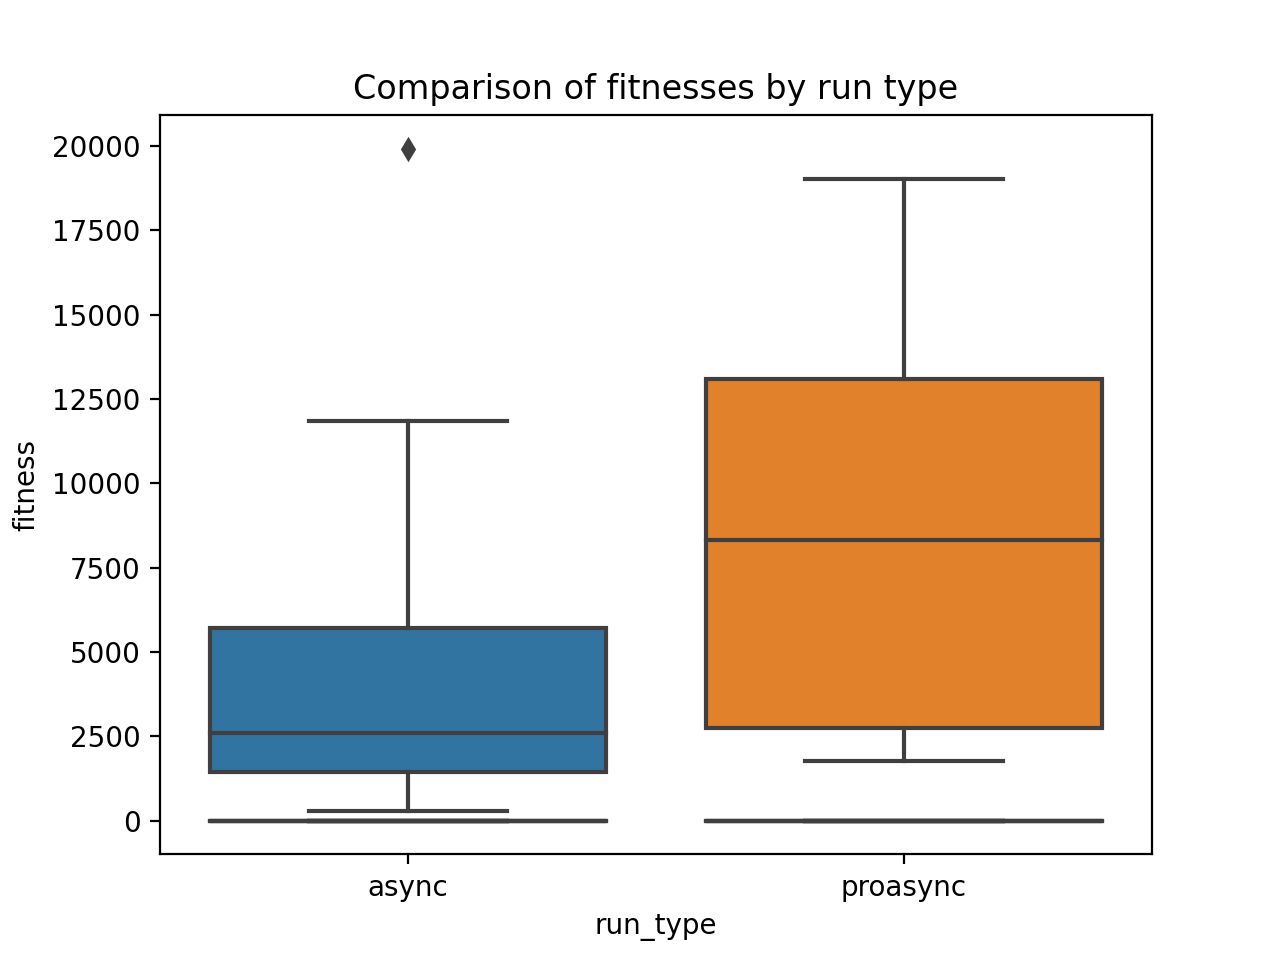

In [25]:
fitness_duration_bp = sns.boxplot(x='run_type', y='found_duration', data=final_when_best_fitnesses)

In [26]:
fitness_duration_bp.axes.set_title('When the best fitnesses were found by run type')
fitness_duration_bp.set_xlabel('Run type')
fitness_duration_bp.axes.set_xticklabels(['Basic async', 'SWEET'])
fitness_duration_bp.set_ylabel('Duration (secs)')
fitness_duration_bp.figure.savefig('f1tenth-fitness-durations.pdf')

In [27]:
# Now to extract the durations from both run types and do a Wilcoxon rank-sum test on those
async_fitness_durations = final_when_best_fitnesses[final_when_best_fitnesses.run_type == 'async'].found_duration
proasync_fitness_durations = final_when_best_fitnesses[final_when_best_fitnesses.run_type == 'proasync'].found_duration

In [28]:
wilcoxon(async_fitness_durations,proasync_fitness_durations)

WilcoxonResult(statistic=17.0, pvalue=0.322265625)

In [29]:
best_async_fitnesses = final_when_best_fitnesses[final_when_best_fitnesses.run_type == 'async'].fitness_x

In [30]:
best_proasync_fitnesses = final_when_best_fitnesses[final_when_best_fitnesses.run_type == 'proasync'].fitness_x

In [31]:
best_async_fitnesses

0    0.131502
1    0.217943
2    0.061458
3    0.423535
4    0.284715
5    0.491908
6    0.114397
7    0.064862
8    0.128881
9    0.615742
Name: fitness_x, dtype: float64

In [32]:
best_proasync_fitnesses

10    0.617815
11    0.678483
12    0.599575
13    0.139518
14    0.669403
15    0.083407
16    0.257839
17    0.188867
18    0.794226
19    0.800674
Name: fitness_x, dtype: float64

In [33]:
wilcoxon(best_async_fitnesses, best_proasync_fitnesses)

WilcoxonResult(statistic=10.0, pvalue=0.083984375)

In [34]:
run_durations.reset_index(drop=False)

,run_type,run,start_eval_time,stop_eval_time,fitness
0,async,0,1.630523e+09,1.630525e+09,0.131502
1,async,1,1.630525e+09,1.630530e+09,0.217943
2,async,2,1.630530e+09,1.630534e+09,0.061458
3,async,3,1.630534e+09,1.630545e+09,0.423535
4,async,4,1.630545e+09,1.630552e+09,0.284715
5,async,5,1.630552e+09,1.630561e+09,0.491908
6,async,6,1.630561e+09,1.630565e+09,0.114397
7,async,7,1.630565e+09,1.630568e+09,0.064862
8,async,8,1.630568e+09,1.630570e+09,0.128881
9,async,9,1.630570e+09,1.630591e+09,0.615742


In [35]:
run_durations.reset_index(drop=False, inplace=True)

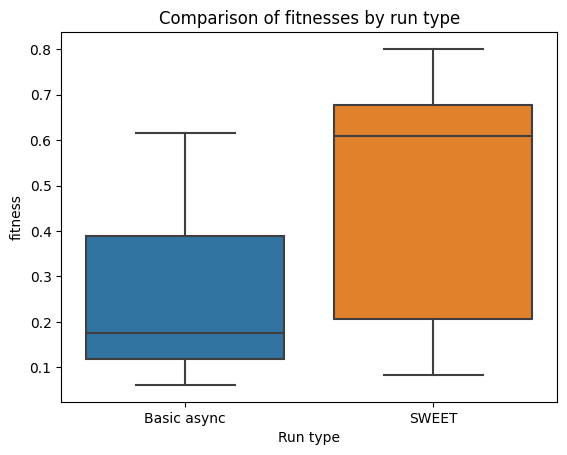

In [41]:
%matplotlib inline
fitness_bp = sns.boxplot(x='run_type', y='fitness', data=run_durations)
fitness_bp.axes.set_title('Comparison of fitnesses by run type')
fitness_bp.axes.set_xticklabels(['Basic async', 'SWEET'])
fitness_bp.set_xlabel('Run type')
fitness_bp.figure.savefig('f1tenth-fitnesses.pdf')

## Fitness trajectories by time

We'd like to see how well each approach does by time.

We have to take the `stop_eval_time` for all the rows and subtract the `start_eval_time` to get the offset into the run for when a given fitness was done.  We've already calculated the `min(start_eval_time)` for each run, so we need to somehow do that duration calculation for *all* the fitnesse for *all* the runs.

In [42]:
run_durations # this has the start_eval_time for each run

,run_type,run,start_eval_time,stop_eval_time,fitness
0,async,0,1.630523e+09,1.630525e+09,0.131502
1,async,1,1.630525e+09,1.630530e+09,0.217943
2,async,2,1.630530e+09,1.630534e+09,0.061458
3,async,3,1.630534e+09,1.630545e+09,0.423535
4,async,4,1.630545e+09,1.630552e+09,0.284715
5,async,5,1.630552e+09,1.630561e+09,0.491908
6,async,6,1.630561e+09,1.630565e+09,0.114397
7,async,7,1.630565e+09,1.630568e+09,0.064862
8,async,8,1.630568e+09,1.630570e+09,0.128881
9,async,9,1.630570e+09,1.630591e+09,0.615742


In [43]:
# "run_start_time" is a good name for when the run started
run_durations.rename(columns={'start_eval_time':'run_start_time'}, inplace=True)

In [44]:
run_durations.head()

,run_type,run,run_start_time,stop_eval_time,fitness
0,async,0,1.630523e+09,1.630525e+09,0.131502
1,async,1,1.630525e+09,1.630530e+09,0.217943
2,async,2,1.630530e+09,1.630534e+09,0.061458
3,async,3,1.630534e+09,1.630545e+09,0.423535
4,async,4,1.630545e+09,1.630552e+09,0.284715


In [45]:
# Maybe a merge will do what we want?
duration_async_and_proasync_df = async_and_proasync_df.merge(run_durations[['run_type','run','run_start_time']], on=['run_type','run'], how='inner')

In [46]:
duration_async_and_proasync_df['fitness_offset'] = duration_async_and_proasync_df['stop_eval_time'] - duration_async_and_proasync_df['run_start_time']

In [47]:
duration_async_and_proasync_df

,hostname,pid,uuid,birth_id,start_eval_time,stop_eval_time,fitness,run,run_type,run_start_time,fitness_offset
0,thelio,16511,d5f230e5-f52a-4138-bbb9-ede9b793e447,28,1.630523e+09,1.630523e+09,0.002308,0,async,1.630523e+09,6.527169
1,thelio,16496,81117255-5ec9-4265-813e-a5c9c294c6d0,29,1.630523e+09,1.630523e+09,0.002866,0,async,1.630523e+09,6.664899
2,thelio,16479,f767ff9e-1c02-4b19-ba0b-4c5f13adfe29,46,1.630523e+09,1.630523e+09,0.002325,0,async,1.630523e+09,6.686283
3,thelio,16511,eb8d36ca-55bb-49c0-8d0d-0bdffa268caf,12,1.630523e+09,1.630523e+09,0.002390,0,async,1.630523e+09,6.809397
4,thelio,16518,63708a16-33b1-489b-83dc-6c522b981a43,15,1.630523e+09,1.630523e+09,0.002164,0,async,1.630523e+09,6.861379
...,...,...,...,...,...,...,...,...,...,...,...
119995,thelio,124168,1bdf6b3b-a32d-4b5a-9f27-a4fdc8bbff32,5984,1.630224e+09,1.630224e+09,0.496145,8,proasync,1.630203e+09,21090.750022
119996,thelio,124147,3309d08a-0097-4037-86b5-1276659b5516,5989,1.630224e+09,1.630224e+09,0.573177,8,proasync,1.630203e+09,21102.122988
119997,thelio,124147,9ba94519-bdd4-42f7-a9bf-efb7e9d32e30,5988,1.630224e+09,1.630224e+09,0.594245,8,proasync,1.630203e+09,21110.043625
119998,thelio,124168,ab6344a6-fc83-4c9e-9148-296a74fe502c,5974,1.630224e+09,1.630224e+09,0.739160,8,proasync,1.630203e+09,21200.739317


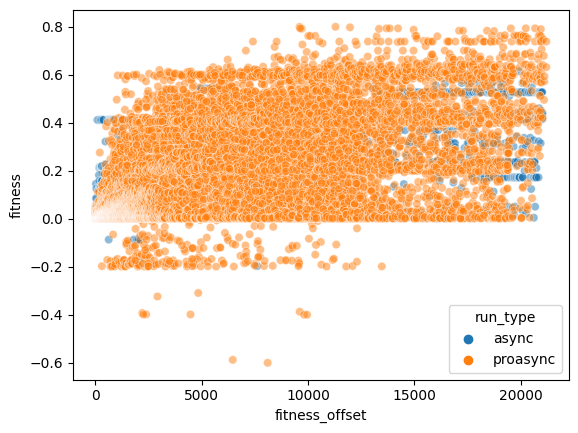

In [48]:
fitness_by_time_bp = sns.scatterplot(x='fitness_offset', y='fitness', hue='run_type', alpha=0.5, data=duration_async_and_proasync_df)

Ok, well, that was interesting exercise in overplotting. May return to this later and bust out the two sets of experiments into separate panels and make the hue the individual run.

Now to get best-so-far curves; maybe first by birth because that will be easier, and then to figure out a way to do that by fitness offset.

In [49]:
# Let's just sample every 250 births
subset_async_and_proasync_df = async_and_proasync_df[async_and_proasync_df.birth_id % 250 == 0]

In [50]:
subset_async_and_proasync_df

,hostname,pid,uuid,birth_id,start_eval_time,stop_eval_time,fitness,run,run_type
10,thelio,16483,393163ca-b99c-4003-acd0-52df381cd1db,0,1.630523e+09,1.630523e+09,0.002462,0,async
251,thelio,16598,77bb94b4-bc9e-4cf0-8d86-01365a10a42b,250,1.630523e+09,1.630523e+09,0.012856,0,async
497,thelio,16479,58286e1d-1e7c-4c9d-8225-74a40c642af4,500,1.630523e+09,1.630523e+09,0.003862,0,async
747,thelio,16500,7be1d45c-9633-499f-88e1-42ab564ce717,750,1.630523e+09,1.630523e+09,0.004116,0,async
1001,thelio,16508,699105e0-5813-4b62-95a1-baccf6f7e966,1000,1.630523e+09,1.630523e+09,0.006858,0,async
...,...,...,...,...,...,...,...,...,...
118691,thelio,124157,a1d6c816-dbc1-4dc3-89ff-09f8152d73c8,4750,1.630212e+09,1.630212e+09,0.004400,8,proasync
118988,thelio,124188,07a8f97c-ae46-46d8-b720-0111e3b595c5,5000,1.630214e+09,1.630214e+09,0.266732,8,proasync
119274,thelio,124162,1807eab9-b121-4c4b-b366-5e9a46baf256,5250,1.630216e+09,1.630217e+09,0.794091,8,proasync
119534,thelio,124175,85d4dfd7-0146-4016-83a8-02e64136414a,5500,1.630219e+09,1.630220e+09,0.608709,8,proasync


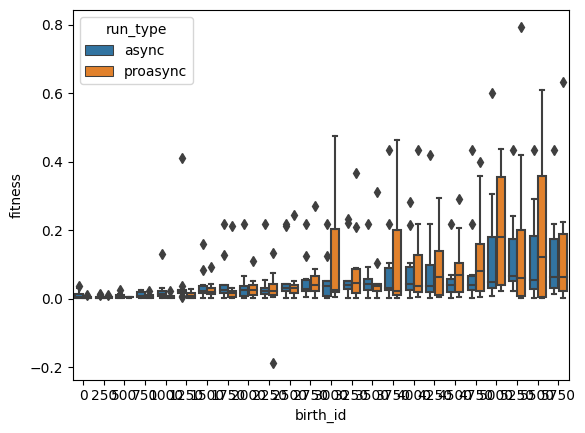

In [51]:
by_birth_plot = sns.boxplot(x='birth_id', y='fitness', hue='run_type', data=subset_async_and_proasync_df)

Ok, that was cute, but we want to get the best-so-far by run.  `cummax` looks to do the trick.

In [52]:
whos

Variable                         Type                Data/Info
--------------------------------------------------------------
Path                             type                <class 'pathlib.Path'>
async_and_proasync_df            DataFrame                  hostname     pid  <...>[120000 rows x 9 columns]
async_df                         DataFrame                hostname    pid     <...>n[60000 rows x 9 columns]
async_fitness_durations          Series              0     1892.585093\n1     <...>_duration, dtype: float64
best_async_fitnesses             Series              0    0.131502\n1    0.217<...>fitness_x, dtype: float64
best_proasync_fitnesses          Series              10    0.617815\n11    0.6<...>fitness_x, dtype: float64
by_birth_plot                    AxesSubplot         AxesSubplot(0.125,0.11;0.775x0.77)
by_run_and_type                  DataFrameGroupBy    <pandas.core.groupby.gene<...>By object at 0x1264d6370>
consolidate_csv_as_df            function            <fu

In [53]:
duration_async_and_proasync_df.sort_values(by=['run_type','run','birth_id'], inplace=True)

In [54]:
duration_async_and_proasync_df

,hostname,pid,uuid,birth_id,start_eval_time,stop_eval_time,fitness,run,run_type,run_start_time,fitness_offset
10,thelio,16483,393163ca-b99c-4003-acd0-52df381cd1db,0,1.630523e+09,1.630523e+09,0.002462,0,async,1.630523e+09,8.231766
30,thelio,16508,c189e1fd-4f19-4006-a1b6-34777d129660,1,1.630523e+09,1.630523e+09,0.003957,0,async,1.630523e+09,9.217261
31,thelio,16521,38c22e28-8c2f-4e96-b4cb-94f35cb4413b,2,1.630523e+09,1.630523e+09,0.002634,0,async,1.630523e+09,9.246291
16,thelio,16532,c652c9ea-8fbf-4d44-a21a-a246c8827497,3,1.630523e+09,1.630523e+09,0.002173,0,async,1.630523e+09,8.406286
40,thelio,16514,171da780-fd80-4b01-aef7-d274a088512a,4,1.630523e+09,1.630523e+09,0.003224,0,async,1.630523e+09,9.830495
...,...,...,...,...,...,...,...,...,...,...,...
113999,thelio,89823,71bfb7ce-3bae-492c-9597-1ccf19d7c9b8,5995,1.630241e+09,1.630241e+09,0.526122,9,proasync,1.630228e+09,12658.955516
113937,thelio,90119,ac26bcae-6c01-4aed-9cdd-f4d084201541,5996,1.630241e+09,1.630241e+09,0.002596,9,proasync,1.630228e+09,12208.951976
113982,thelio,90119,34aab229-902f-4194-87cb-79a186ca70fd,5997,1.630241e+09,1.630241e+09,0.250626,9,proasync,1.630228e+09,12406.080253
113987,thelio,89842,34ac3ebe-85c7-428b-826e-7d59df0f57ba,5998,1.630241e+09,1.630241e+09,0.446285,9,proasync,1.630228e+09,12495.738043


In [55]:
duration_async_and_proasync_df['best_so_far'] = duration_async_and_proasync_df.groupby(['run_type','run']).fitness.cummax()

In [56]:
duration_async_and_proasync_df

,hostname,pid,uuid,birth_id,start_eval_time,stop_eval_time,fitness,run,run_type,run_start_time,fitness_offset,best_so_far
10,thelio,16483,393163ca-b99c-4003-acd0-52df381cd1db,0,1.630523e+09,1.630523e+09,0.002462,0,async,1.630523e+09,8.231766,0.002462
30,thelio,16508,c189e1fd-4f19-4006-a1b6-34777d129660,1,1.630523e+09,1.630523e+09,0.003957,0,async,1.630523e+09,9.217261,0.003957
31,thelio,16521,38c22e28-8c2f-4e96-b4cb-94f35cb4413b,2,1.630523e+09,1.630523e+09,0.002634,0,async,1.630523e+09,9.246291,0.003957
16,thelio,16532,c652c9ea-8fbf-4d44-a21a-a246c8827497,3,1.630523e+09,1.630523e+09,0.002173,0,async,1.630523e+09,8.406286,0.003957
40,thelio,16514,171da780-fd80-4b01-aef7-d274a088512a,4,1.630523e+09,1.630523e+09,0.003224,0,async,1.630523e+09,9.830495,0.003957
...,...,...,...,...,...,...,...,...,...,...,...,...
113999,thelio,89823,71bfb7ce-3bae-492c-9597-1ccf19d7c9b8,5995,1.630241e+09,1.630241e+09,0.526122,9,proasync,1.630228e+09,12658.955516,0.800674
113937,thelio,90119,ac26bcae-6c01-4aed-9cdd-f4d084201541,5996,1.630241e+09,1.630241e+09,0.002596,9,proasync,1.630228e+09,12208.951976,0.800674
113982,thelio,90119,34aab229-902f-4194-87cb-79a186ca70fd,5997,1.630241e+09,1.630241e+09,0.250626,9,proasync,1.630228e+09,12406.080253,0.800674
113987,thelio,89842,34ac3ebe-85c7-428b-826e-7d59df0f57ba,5998,1.630241e+09,1.630241e+09,0.446285,9,proasync,1.630228e+09,12495.738043,0.800674


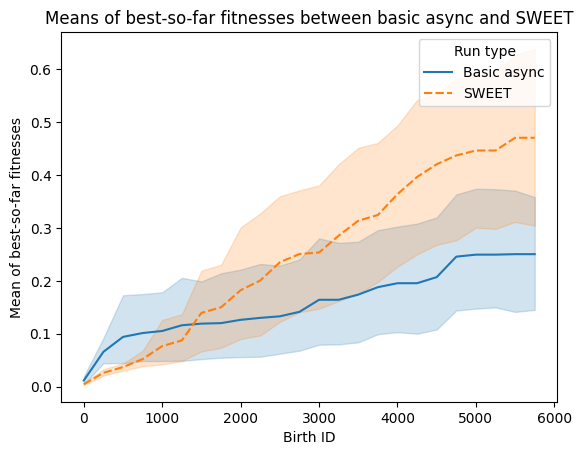

In [58]:
line_plot = sns.lineplot(x='birth_id', y='best_so_far', ci=95, hue='run_type', style='run_type', 
                         data=duration_async_and_proasync_df[duration_async_and_proasync_df.birth_id % 250 == 0])
line_plot.axes.set_title('Means of best-so-far fitnesses between basic async and SWEET')
line_plot.set_xlabel('Birth ID')
line_plot.set_ylabel('Mean of best-so-far fitnesses')
line_plot.legend(title='Run type', labels=['Basic async','SWEET'])
line_plot.figure.savefig('f1tenth-best-so-far-mean.pdf')

In [59]:
mean_best_so_far = duration_async_and_proasync_df.groupby(['run_type','birth_id'])[['best_so_far']].mean()

In [60]:
mean_best_so_far

best_so_far
run_type birth_id             
async    0            0.011670
         1            0.011915
         2            0.011915
         3            0.012640
         4            0.012729
...                        ...
proasync 5995         0.482981
         5996         0.482981
         5997         0.482981
         5998         0.482981
         5999         0.482981

[12000 rows x 1 columns]

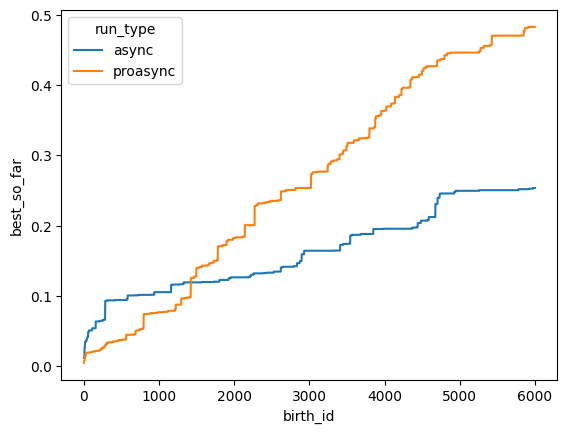

In [61]:
mean_plot = sns.lineplot(x='birth_id', y='best_so_far', hue='run_type', ci=95, data=mean_best_so_far)